In [1]:
import pandas as pd
import os
import cv2
import csv
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import h5py
from torchvision import transforms
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
def imageGenerator():
    input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'
    output_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data'
    datas = []
    img_size = (256,256)
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.mat'):
            file_path = os.path.join(input_folder,file_name)
            
            with h5py.File(file_path, 'r') as f:
                image = np.array(f['cjdata/image']).T
                label = int(np.array(f['cjdata/label'])[0,0])
                tumor_border = np.array(f['cjdata/tumorBorder']).T
                tumor_mask = np.array(f['cjdata/tumorMask']).T
    
            '''image = image.astype(np.float64)
            im_norm = 255*(image-image.min())/(image.max()-image.min())
            im_uint8 = im_norm.astype(np.uint8)
            im_pil = Image.fromarray(im_uint8)
            im_pil = im_pil.resize(img_size)'''

            image = image.astype(np.float32)
            #image = image / (image.max() + 1e-8)
            img = Image.fromarray((image*255).astype(np.uint8))
            img = img.resize(img_size)
            arr = np.array(img,dtype=np.float32)/255.0
            arr = np.expand_dims(arr,axis=-1)

                        
            datas.append((arr,label))
    return datas

In [3]:
try:
    datas = imageGenerator()
except ValueError:
    print('Hibás érték')

In [4]:
labels = ['meningioma', 'glioma', 'pituitary tumor']

In [5]:
X = [item[0] for item in datas]
y = [item[1]-1 for item in datas] 

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
model = models.Sequential()
model.add(layers.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(3,activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)


'''
Pontosság: 0.8725296442687747

Részletes riport:
               precision    recall  f1-score   support

         1.0       0.84      0.66      0.74       251
         2.0       0.86      0.94      0.90       446
         3.0       0.92      0.94      0.93       315

    accuracy                           0.87      1012
   macro avg       0.87      0.85      0.86      1012
weighted avg       0.87      0.87      0.87      1012
-----------------------------------------------------------
Pontosság: 0.9130434782608695

Részletes riport:
               precision    recall  f1-score   support

         1.0       0.81      0.88      0.84       251
         2.0       0.94      0.88      0.91       446
         3.0       0.97      0.98      0.97       315

    accuracy                           0.91      1012
   macro avg       0.91      0.92      0.91      1012
weighted avg       0.92      0.91      0.91      1012
'''

'\nPontosság: 0.8725296442687747\n\nRészletes riport:\n               precision    recall  f1-score   support\n\n         1.0       0.84      0.66      0.74       251\n         2.0       0.86      0.94      0.90       446\n         3.0       0.92      0.94      0.93       315\n\n    accuracy                           0.87      1012\n   macro avg       0.87      0.85      0.86      1012\nweighted avg       0.87      0.87      0.87      1012\n-----------------------------------------------------------\nPontosság: 0.9130434782608695\n\nRészletes riport:\n               precision    recall  f1-score   support\n\n         1.0       0.81      0.88      0.84       251\n         2.0       0.94      0.88      0.91       446\n         3.0       0.97      0.98      0.97       315\n\n    accuracy                           0.91      1012\n   macro avg       0.91      0.92      0.91      1012\nweighted avg       0.92      0.91      0.91      1012\n'

In [10]:
'''model = models.Sequential()
model.add(layers.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)
'''

"model = models.Sequential()\nmodel.add(layers.Input(shape=(256, 256, 1)))\nmodel.add(layers.Conv2D(8, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(16, (3, 3), activation='relu'))\nmodel.add(layers.GlobalAveragePooling2D())\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(3,activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)\n"

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,667 (37.76 KB)

 Trainable params: 9,667 (37.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
'''X_train = np.array(X_train,dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)'''

'X_train = np.array(X_train,dtype=np.float32)\nX_test = np.array(X_test,dtype=np.float32)\ny_train = np.array(y_train,dtype=np.float32)\ny_test = np.array(y_test,dtype=np.float32)'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datageneration = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
train_generated = datageneration.flow(X_train,y_train,batch_size=32)

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(train_generated, epochs=20, validation_data=(X_test,y_test))

C:\Users\marto\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - accuracy: 0.4650 - loss: 1.0743 - val_accuracy: 0.4407 - val_loss: 1.0832
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - accuracy: 0.4771 - loss: 1.0573 - val_accuracy: 0.4407 - val_loss: 1.0640
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.4987 - loss: 1.0170 - val_accuracy: 0.4802 - val_loss: 1.0062
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.4920 - loss: 0.9804 - val_accuracy: 0.5494 - val_loss: 0.9607
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.5063 - loss: 0.9628 - val_accuracy: 0.5731 - val_loss: 0.9315
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.5303 - loss: 0.9474 - val_accuracy: 0.5553 - val_loss: 0.9493
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.4932 - loss: 0.9721 - val_accuracy: 0.5583 - val_loss: 0.9281
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - accuracy: 0.5457 - loss: 0.9214 - val_accu

In [15]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Pontosság kiírása
from sklearn.metrics import accuracy_score, classification_report

print("Pontosság:", accuracy_score(y_test, predicted_classes))
print("\nRészletes riport:\n", classification_report(y_test, predicted_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
Pontosság: 0.7154150197628458

Részletes riport:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       251
           1       0.78      0.70      0.74       446
           2       0.62      0.81      0.70       315

    accuracy                           0.72      1012
   macro avg       0.73      0.71      0.71      1012
weighted avg       0.73      0.72      0.72      1012



In [16]:
import joblib as jl
#model.save('C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationModel.h5')
jl.dump(history,'C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationHistory.pkl')

['C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationHistory.pkl']

In [17]:
accuracy_score(y_test, predicted_classes)

0.7154150197628458

In [18]:
# 1. Pontosság (Accuracy)
accuracy_score(y_test, predicted_classes)

0.7154150197628458

In [19]:
# 2. Precision, Recall, F1-score
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70       251
           1       0.78      0.70      0.74       446
           2       0.62      0.81      0.70       315

    accuracy                           0.72      1012
   macro avg       0.73      0.71      0.71      1012
weighted avg       0.73      0.72      0.72      1012



In [20]:
# 3. Confusion Matrix

#confusion_matrix = metrics.confusion_matrix(actual, predicted)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])


In [21]:
# 4. ROC-AUC (Receiver Operating Characteristic - Area Under Curve) ------ nem releváns

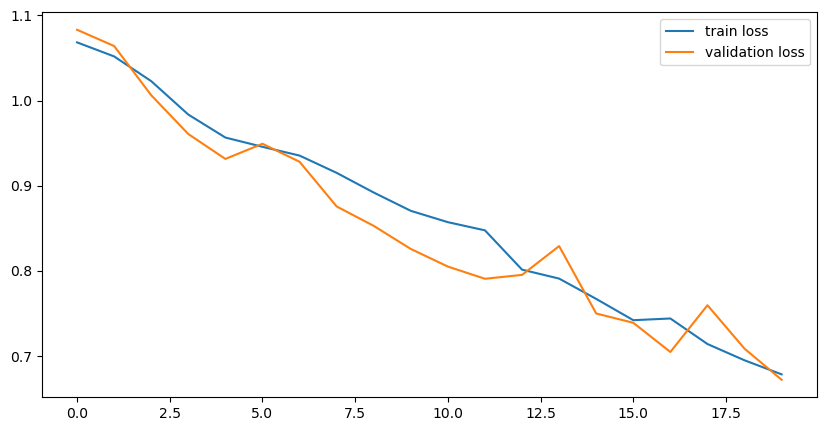

In [22]:
# 5. Loss (veszteség) érték
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [23]:
history.history['loss']

[1.0683587789535522,
 1.051837682723999,
 1.0227997303009033,
 0.9835626482963562,
 0.9565719962120056,
 0.9456958174705505,
 0.9353819489479065,
 0.915101170539856,
 0.8919882774353027,
 0.8704883456230164,
 0.8571721315383911,
 0.8475651144981384,
 0.8013985753059387,
 0.7909010648727417,
 0.767045259475708,
 0.7420401573181152,
 0.7440512180328369,
 0.7140625715255737,
 0.6949267387390137,
 0.6784371733665466]

In [24]:
history.history['val_loss']

[1.0831533670425415,
 1.0640380382537842,
 1.0062345266342163,
 0.9606881737709045,
 0.9314515590667725,
 0.9492791891098022,
 0.9281243085861206,
 0.8756393194198608,
 0.8528204560279846,
 0.8257017135620117,
 0.8050311803817749,
 0.7906890511512756,
 0.7952558994293213,
 0.8290579915046692,
 0.7499071955680847,
 0.7390122413635254,
 0.7047150731086731,
 0.7595937848091125,
 0.7085976004600525,
 0.6720582246780396]

In [25]:
# 6. Tanulási görbe

In [26]:
# 7. Modelméret ------ nem releváns

In [27]:
# 8. Inference sebesség / Latencia ------ nem releváns

In [28]:
# 9. Train Time (Tanítási idő)

In [29]:
# 10. Generalizációs képesség ------- nem tudom 

In [30]:
print(len(y_test))

1012


In [31]:
with open('C:/Users/marto/Desktop/Thesis/backend/brainTumor_y_test.npy', 'w') as filehandle:  
    filehandle.writelines("%s\n" % x for x in y_test)

In [32]:
y_test = []
with open('C:/Users/marto/Desktop/Thesis/backend/brainTumor_y_test.txt', 'r') as filehandle: 
    content = filehandle.readlines()
    for data in content:
        y_test.append(data[:-1])

In [33]:
#y_test

In [34]:
with open('C:/Users/marto/Desktop/Thesis/backend/brainTumor_X_test.npy', 'w') as filehandle:  
    filehandle.writelines("%s\n" % x for x in X_test)

In [35]:
np.save('C:/Users/marto/Desktop/Thesis/backend/brainTumor_y_test.npy',y_test)
np.save('C:/Users/marto/Desktop/Thesis/backend/brainTumor_X_test.npy',X_test)

In [36]:
np.array(history.history['loss']).sum()/len(np.array(history.history['loss']))

0.8639693200588227

In [37]:
pred = model.predict(np.expand_dims(X[21],axis=0))
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predikált osztály: [2], valószínűség: 0.72


In [38]:
y[0]

0

In [39]:
y[1]

0

In [40]:
y[2]

0

In [41]:
y[5]

2

In [42]:
y[100]

2

In [43]:
y[21]

2

In [44]:
image = X[21]
np.save("C:/Users/marto/Desktop/Thesis/backend/test_img.npy", image)


In [45]:
img = np.load("C:/Users/marto/Desktop/Thesis/backend/test_img.npy")
import tensorflow as tf
img = np.expand_dims(img,axis=0)
img_tf = tf.convert_to_tensor(img, dtype=tf.float32)
pred = model(img_tf, training=False)

'''
img = img.astype(np.float32)/255.0
img = np.expand_dims(img,axis=-1)
img = np.expand_dims(img,axis=0)
print(img.shape, img.min(), img.max())
pred = model.predict(img)'''
print(pred)


tf.Tensor([[0.22638743 0.05192381 0.72168875]], shape=(1, 3), dtype=float32)


In [46]:
pred_class = int(np.argmax(pred, axis=1)[0])  # az osztály indexe (0-tól)
pred_prob = float(np.max(pred))  # a valószínűsége
print("Predicted class:", pred_class)
print("Probability:", pred_prob)

Predicted class: 2
Probability: 0.7216887474060059


In [47]:
print(model.summary())
print("Input shape:", model.input_shape)
print("Output shape:", model.output_shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,003 (113.30 KB)

 Trainable params: 9,667 (37.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,336 (75.54 KB)

None
Input shape: (None, 256, 256, 1)
Output shape: (None, 3)


In [48]:
img = np.array(img, dtype=np.float32)
img

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]], dtype=float32)

In [49]:
print("Model input shape:", model.input_shape)
print("Image shape:", img.shape)

Model input shape: (None, 256, 256, 1)
Image shape: (1, 256, 256, 1)


In [50]:
sorted(os.listdir(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'))

['.ipynb_checkpoints',
 '1.mat',
 '10.mat',
 '100.mat',
 '1000.mat',
 '1001.mat',
 '1002.mat',
 '1003.mat',
 '1004.mat',
 '1005.mat',
 '1006.mat',
 '1007.mat',
 '1008.mat',
 '1009.mat',
 '101.mat',
 '1010.mat',
 '1011.mat',
 '1012.mat',
 '1013.mat',
 '1014.mat',
 '1015.mat',
 '1016.mat',
 '1017.mat',
 '1018.mat',
 '1019.mat',
 '102.mat',
 '1020.mat',
 '1021.mat',
 '1022.mat',
 '1023.mat',
 '1024.mat',
 '1025.mat',
 '1026.mat',
 '1027.mat',
 '1028.mat',
 '1029.mat',
 '103.mat',
 '1030.mat',
 '1031.mat',
 '1032.mat',
 '1033.mat',
 '1034.mat',
 '1035.mat',
 '1036.mat',
 '1037.mat',
 '1038.mat',
 '1039.mat',
 '104.mat',
 '1040.mat',
 '1041.mat',
 '1042.mat',
 '1043.mat',
 '1044.mat',
 '1045.mat',
 '1046.mat',
 '1047.mat',
 '1048.mat',
 '1049.mat',
 '105.mat',
 '1050.mat',
 '1051.mat',
 '1052.mat',
 '1053.mat',
 '1054.mat',
 '1055.mat',
 '1056.mat',
 '1057.mat',
 '1058.mat',
 '1059.mat',
 '106.mat',
 '1060.mat',
 '1061.mat',
 '1062.mat',
 '1063.mat',
 '1064.mat',
 '1065.mat',
 '1066.mat',
 

In [51]:
y[0]

0

In [52]:
y[9]

2

In [53]:
y[99]

2

In [54]:
y[999]

1